In [1]:
from sklearn import tree
import pandas as pd
import os
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import re
from matplotlib import pyplot as plt
from wordcloud import WordCloud 

In [2]:
df = pd.read_csv(os.path.join("..", "data", "final_bitcoin.csv"))
df.head()

,Unnamed: 0,Datetime,cleaned,negative,neutral,positive,comp
0,0,2022-05-01,"['oh', 'think', 'im', 'pull', 'ass', 'bitcoin'...",0.304,0.696,0.000,-0.5423
1,1,2022-05-01,"['cryptic', 'oz', 'bitcoin', 'es', 'baloncesto...",0.000,1.000,0.000,0.0000
2,2,2022-05-01,"['un', 'long', 'sandbox', 'sandbox', 'crypto',...",0.000,1.000,0.000,0.0000
3,3,2022-05-01,"['realiz', 'attract', 'religion', 'asset', 'pr...",0.000,0.414,0.586,0.8360
4,4,2022-05-01,"['ridicul', 'stock', 'bitcoin', 'money', 'lite...",0.114,0.773,0.114,0.0000


In [3]:
df_neg = df[df['negative'] > 0.2]
df_pos = df[df['positive'] > 0.2]

In [4]:
df_pos

,Unnamed: 0,Datetime,cleaned,negative,neutral,positive,comp
3,3,2022-05-01,"['realiz', 'attract', 'religion', 'asset', 'pr...",0.000,0.414,0.586,0.8360
8,8,2022-05-01,"['outkastnft', 'se7enthdegen', 'gooneytoonsnft...",0.000,0.672,0.328,0.5267
18,18,2022-05-01,"['willpapp', 'hahahaha', 'holyyyy', 'cow', 'lm...",0.180,0.619,0.201,0.1027
19,19,2022-05-01,"['letsgo', 'bitcoin', 'well']",0.000,0.488,0.512,0.2732
25,25,2022-05-01,"['yet', 'invent', 'guy', 'bitcoin', 'person', ...",0.000,0.733,0.267,0.5780
...,...,...,...,...,...,...,...
149980,9966,2022-05-14,"['tendermint', 'bitcoin', 'cool', 'lil', 'gizmo']",0.000,0.635,0.365,0.3182
149982,9968,2022-05-14,"['market', 'ralli', 'friday', 'dead', 'cat', '...",0.223,0.518,0.259,-0.0772
149989,9975,2022-05-14,"['bitcoin', 'like', 'allig', 'feed', 'full', '...",0.000,0.737,0.263,0.3612
149992,9978,2022-05-14,"['refer', 'friend', 'get', '100', 'usdt', 'htt...",0.000,0.758,0.242,0.4939


In [5]:
print(len(df_neg))
print(len(df_pos))

5283
16407

13489
25287


16407

In [6]:
positive = df_pos['cleaned']


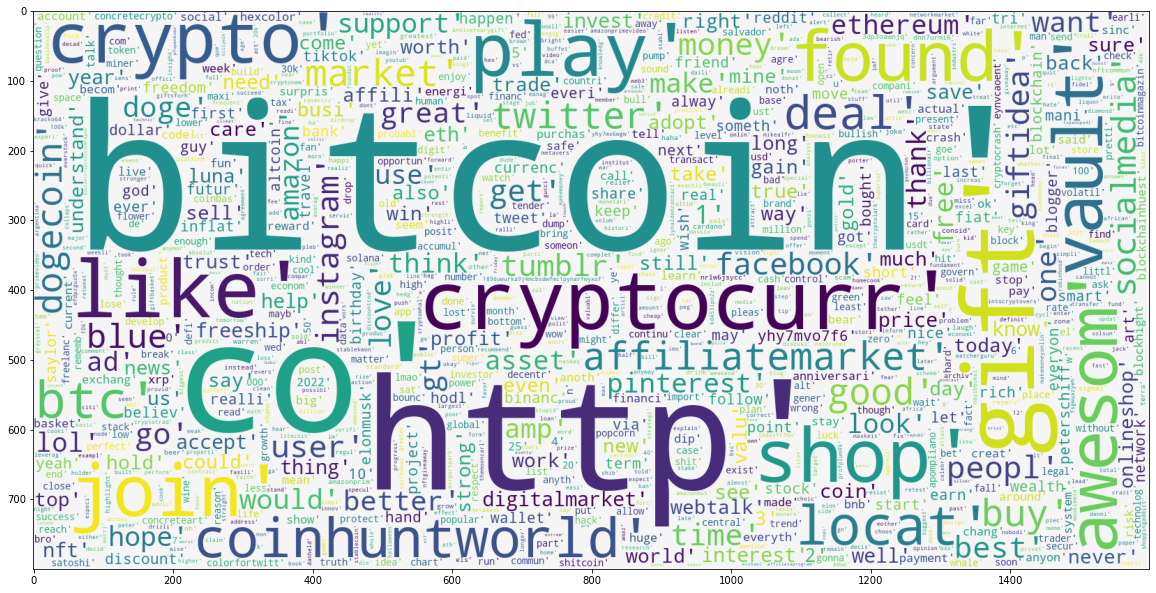

In [7]:
positive = df_pos['cleaned']
plt.figure(figsize = (20,20))
wc = WordCloud(background_color='whitesmoke',max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(positive))
plt.imshow(wc)

plt.savefig("../images/btcwcpos.png")

In [ ]:
negative = df_neg['cleaned']
plt.figure(figsize = (20,20))
wc2 = WordCloud(background_color='whitesmoke',max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative))
plt.imshow(wc2)

plt.savefig("../images/btcwcneg.png")

In [ ]:

##asigning value to positive, negative and neutral, negative(0), neutral(1), positive(2)
sentiment0=[]
for i in range(len(df)):
    if df.loc[i,'negative']>0:
        sentiment0+=[0]
    elif df.loc[i,'positive']>0:
        sentiment0+=[2]        
    else:
        sentiment0+=[1]     

In [ ]:
df['sentiment']=sentiment0
df['sentiment'].value_counts()
bitcoin = df.rename(columns={"Datetime": "date"})
bitcoin.head()

In [ ]:
target = bitcoin["cleaned"]
target_names = bitcoin[["sentiment"]]


In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(target, target_names,test_size = 0.05, random_state = 42)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=600000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    sentiment = ['Negative','Neutral', 'Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, cmap = 'Blues', annot=True, fmt='d',
                xticklabels = sentiment, yticklabels = sentiment)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    

In [ ]:
BNBmodel = BernoulliNB()
plt.figure(figsize = (6,5))
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

# plt.savefig("../images/btcconfusion.png")

In [ ]:
crypto = pd.read_csv(os.path.join("../Data", "price.csv"))

In [ ]:
crypto['Change BTC'] = crypto.bitcoin_price - crypto.bitcoin_price.shift(1)
crypto

In [ ]:
crypto['BTC Up/Down'] = np.where(crypto['Change BTC']>0, 1, 0)
crypto

In [ ]:
btc_sentiment = bitcoin.groupby('date')['sentiment'].mean()
btc_sentiment = btc_sentiment.reset_index()
btc_sentiment

In [ ]:
btc_sentiment_move = pd.merge(btc_sentiment, crypto,how='outer', on='date')

In [ ]:
btc_sentiment_move.dropna(subset=['sentiment'])

In [82]:
btc_clean = btc_sentiment_move.drop(columns=['ethereum_price', 'dogecoin_price'])
btc_clean1 = btc_clean.dropna(subset=['sentiment'])

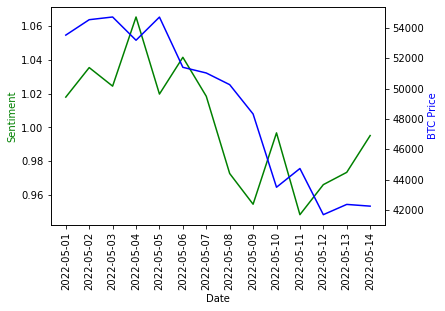

In [83]:
x = btc_clean1["date"]
y1 = btc_clean1["sentiment"]
y2 = btc_clean1["bitcoin_price"]


fig, ax1 = plt.subplots()

plt.xticks(rotation = 90)
ax2 = ax1.twinx()


ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('BTC Price', color='b')


# plt.savefig("../images/btcprice.png",bbox_inches='tight')

plt.show()



In [84]:
btc1 = bitcoin.drop(columns=["Unnamed: 0"], axis = 1)
btc1

,date,cleaned,negative,neutral,positive,comp,sentiment
0,2022-05-01,"['oh', 'think', 'im', 'pull', 'ass', 'bitcoin'...",0.304,0.696,0.000,-0.5423,0
1,2022-05-01,"['cryptic', 'oz', 'bitcoin', 'es', 'baloncesto...",0.000,1.000,0.000,0.0000,1
2,2022-05-01,"['un', 'long', 'sandbox', 'sandbox', 'crypto',...",0.000,1.000,0.000,0.0000,1
3,2022-05-01,"['realiz', 'attract', 'religion', 'asset', 'pr...",0.000,0.414,0.586,0.8360,2
4,2022-05-01,"['ridicul', 'stock', 'bitcoin', 'money', 'lite...",0.114,0.773,0.114,0.0000,0
...,...,...,...,...,...,...,...
150010,2022-05-14,"['investi', 'dan', 'le', 'bitcoin', 'fin', 'du...",0.000,1.000,0.000,0.0000,1
150011,2022-05-14,"['crypto', 'gateway', 'purtroppo', 'che', 'bit...",0.000,0.934,0.066,0.3400,2
150012,2022-05-14,"['new', 'piec', 'bitcoin', 'mine', 'encourag',...",0.000,1.000,0.000,0.0000,1
150013,2022-05-14,"['bitcoin', 'last', 'price', '29343', 'btc', '...",0.055,0.945,0.000,-0.2960,0


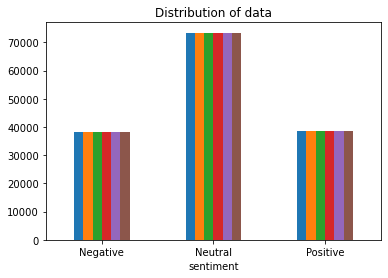

In [85]:
# Plotting the distribution for dataset.
ax = btc1.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(btc1['cleaned']), list(btc1['sentiment'])

plt.savefig("../images/btcsentiment.png")

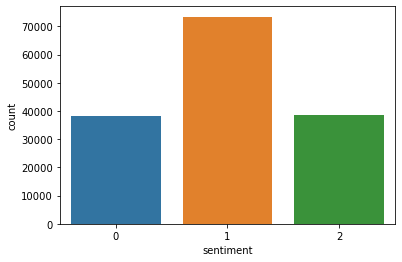

In [86]:
import seaborn as sns
sns.countplot(x='sentiment', data=btc1)

plt.savefig("../images/btcsentiment2.png")

In [87]:
data = btc1[['cleaned', 'sentiment']]
data

,cleaned,sentiment
0,"['oh', 'think', 'im', 'pull', 'ass', 'bitcoin'...",0
1,"['cryptic', 'oz', 'bitcoin', 'es', 'baloncesto...",1
2,"['un', 'long', 'sandbox', 'sandbox', 'crypto',...",1
3,"['realiz', 'attract', 'religion', 'asset', 'pr...",2
4,"['ridicul', 'stock', 'bitcoin', 'money', 'lite...",0
...,...,...
150010,"['investi', 'dan', 'le', 'bitcoin', 'fin', 'du...",1
150011,"['crypto', 'gateway', 'purtroppo', 'che', 'bit...",2
150012,"['new', 'piec', 'bitcoin', 'mine', 'encourag',...",1
150013,"['bitcoin', 'last', 'price', '29343', 'btc', '...",0


In [88]:
#Separating the postivie and negative tweets
data_pos = data[data['sentiment'] == 2]
data_neg = data[data['sentiment'] == 0]

In [89]:
dataset = pd.concat([data_pos, data_neg])
dataset

,cleaned,sentiment
3,"['realiz', 'attract', 'religion', 'asset', 'pr...",2
8,"['outkastnft', 'se7enthdegen', 'gooneytoonsnft...",2
17,"['basic', 'much', '20', 'year', 'old', 'thousa...",2
19,"['letsgo', 'bitcoin', 'well']",2
20,"['uno', 'de', 'lo', 'pa', 'se', 'meno', 'desar...",2
...,...,...
149993,"['follow', 'crash', 'toward', '26k', 'next', '...",0
149995,"['noth', 'stop', 'idea', 'whose', 'time', 'com...",0
150000,"['price', 'ethereum', 'drop', 'nearli', '10', ...",0
150008,"['would', 'hilari', 'play', 'anger', 'ct', 'wo...",0


In [90]:
dataset['cleaned']=dataset['cleaned'].str.lower()
dataset['cleaned'].tail()

149993    ['follow', 'crash', 'toward', '26k', 'next', '...
149995    ['noth', 'stop', 'idea', 'whose', 'time', 'com...
150000    ['price', 'ethereum', 'drop', 'nearli', '10', ...
150008    ['would', 'hilari', 'play', 'anger', 'ct', 'wo...
150013    ['bitcoin', 'last', 'price', '29343', 'btc', '...
Name: cleaned, dtype: object

In [91]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [92]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['cleaned'] = dataset['cleaned'].apply(lambda text: cleaning_stopwords(text))
dataset['cleaned'].head()

3     ['realiz', 'attract', 'religion', 'asset', 'pr...
8     ['outkastnft', 'se7enthdegen', 'gooneytoonsnft...
17    ['basic', 'much', '20', 'year', 'old', 'thousa...
19                        ['letsgo', 'bitcoin', 'well']
20    ['uno', 'de', 'lo', 'pa', 'se', 'meno', 'desar...
Name: cleaned, dtype: object

In [93]:
#Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['cleaned']= dataset['cleaned'].apply(lambda x: cleaning_punctuations(x))
dataset['cleaned'].tail()

149993    follow crash toward 26k next bitcoin btc techn...
149995               noth stop idea whose time come bitcoin
150000    price ethereum drop nearli 10 24 hour put 2 10...
150008    would hilari play anger ct would intens bitcoi...
150013    bitcoin last price 29343 btc daili indic rsi 2...
Name: cleaned, dtype: object

In [94]:
import re

#Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_repeating_char(x))
dataset['cleaned'].tail()

149993    follow crash toward 26k next bitcoin btc techn...
149995               noth stop idea whose time come bitcoin
150000    price ethereum drop nearli10 24 hour put 2100 ...
150008    would hilari play anger ct would intens bitcoi...
150013    bitcoin last price 29343 btc daili indic rsi 2...
Name: cleaned, dtype: object

In [95]:
#Cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_URLs(x))
dataset['cleaned'].tail()

149993    follow crash toward 26k next bitcoin btc techn...
149995               noth stop idea whose time come bitcoin
150000    price ethereum drop nearli10 24 hour put 2100 ...
150008    would hilari play anger ct would intens bitcoi...
150013    bitcoin last price 29343 btc daili indic rsi 2...
Name: cleaned, dtype: object

In [96]:
#Cleaning numbers out
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_numbers(x))
dataset['cleaned'].tail()

149993    follow crash toward k next bitcoin btc technic...
149995               noth stop idea whose time come bitcoin
150000    price ethereum drop nearli  hour put  mark fir...
150008    would hilari play anger ct would intens bitcoi...
150013    bitcoin last price  btc daili indic rsi       ...
Name: cleaned, dtype: object

In [97]:
#appllying stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['cleaned']= dataset['cleaned'].apply(lambda x: stemming_on_text(x))
dataset['cleaned'].head()

3     realiz attract religion asset price play impor...
8     outkastnft seenthdegen gooneytoonsnft nft ok u...
17    basic much  year old thousand dollar invest wa...
19                                  letsgo bitcoin well
20    uno de lo pa se meno desarrollado del mundo ad...
Name: cleaned, dtype: object

In [98]:
#applying lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: lemmatizer_on_text(x))
dataset['cleaned'].head()
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

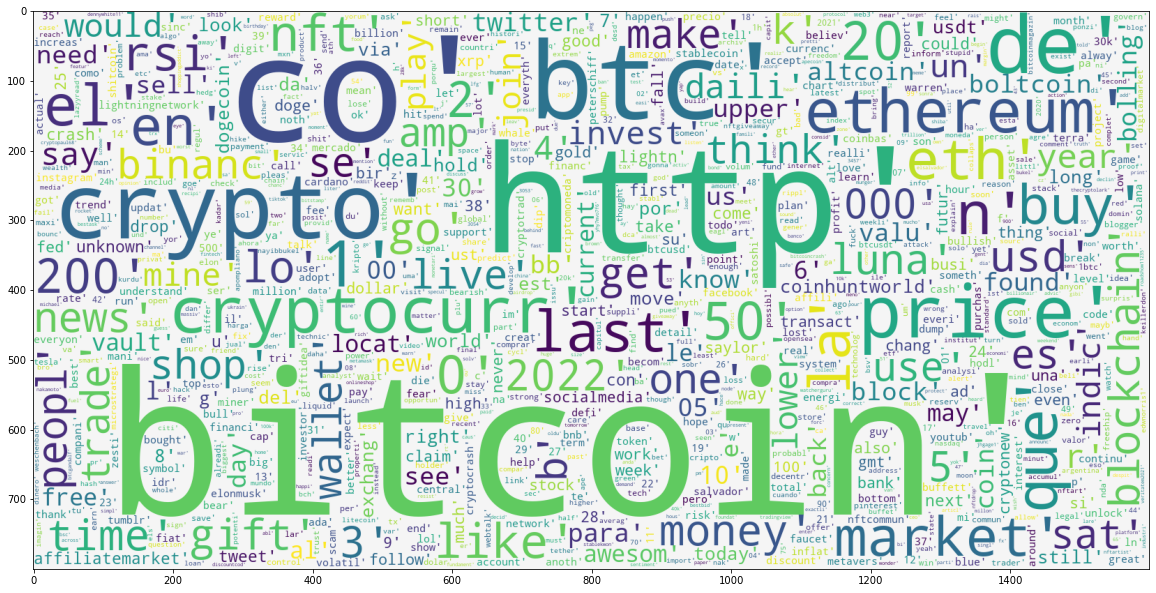

In [99]:
data_neg = data['cleaned'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , background_color='whitesmoke',width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

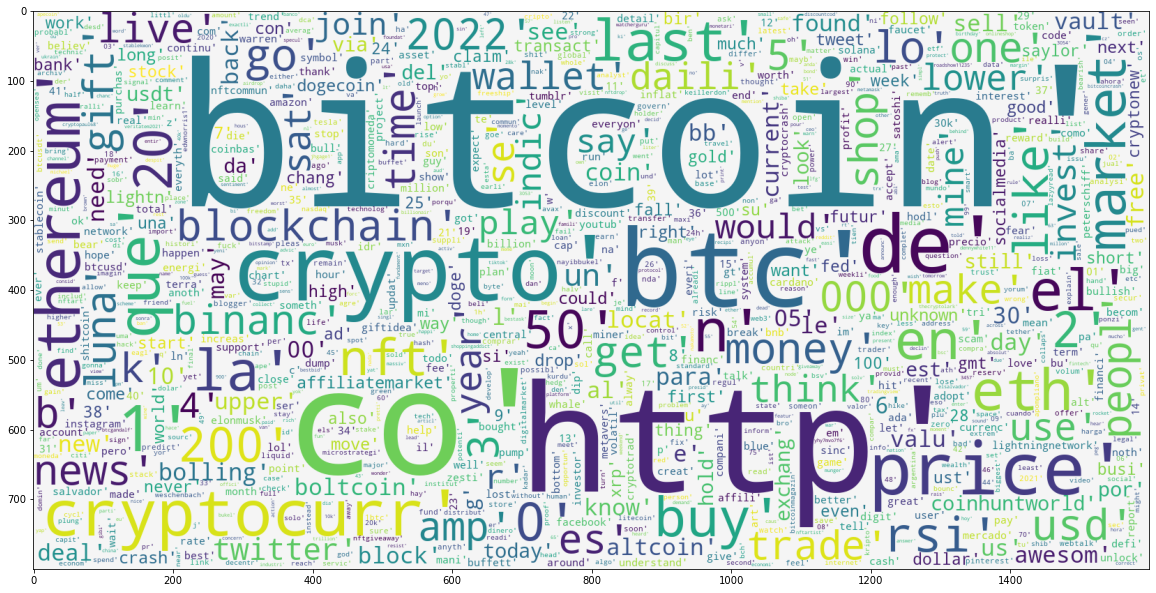

In [100]:

data_pos = data['cleaned'][:800000]
plt.figure(figsize = (20,20))
wc2 = WordCloud(max_words = 1000 , background_color='whitesmoke',width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc2)

In [115]:
btc = btc_sentiment_move[(btc_sentiment_move['date'] > '2022-04-30') & (btc_sentiment_move['date'] < '2022-05-16')]
btc

,date,sentiment,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,bitcoin_volume,ethereum_volume,dogecoin_volume,Change BTC,BTC Up/Down
0,2022-05-01,1.017998,712,53518.018858,3874.650573,0.180779,2.965347e+10,1.785574e+10,1.206468e+09,-1174.403464,0
1,2022-05-02,1.035496,713,54531.860549,4008.085357,0.188247,3.517429e+10,2.050259e+10,1.306821e+09,1013.841691,1
2,2022-05-03,1.024498,714,54709.645087,4059.288782,0.186066,4.231498e+10,2.511270e+10,1.018619e+09,177.784538,1
3,2022-05-04,1.065493,715,53180.614016,3921.344785,0.182778,3.249291e+10,1.806705e+10,7.256790e+08,-1529.031071,0
4,2022-05-05,1.019798,716,54702.555595,4053.948028,0.187391,4.374783e+10,2.388912e+10,1.048635e+09,1521.941579,1
5,2022-05-06,1.041596,717,51400.311798,3866.281839,0.180483,5.250914e+10,2.929791e+10,1.573665e+09,-3302.243797,0
6,2022-05-07,1.018498,718,51026.289235,3814.224690,0.180969,4.552599e+10,2.898637e+10,1.233530e+09,-374.022563,0
7,2022-05-08,0.972703,719,50259.004275,3731.605078,0.180549,2.702844e+10,1.770002e+10,1.007459e+09,-767.284960,0
8,2022-05-09,0.954505,720,48329.555540,3571.264784,0.176215,4.370554e+10,2.919468e+10,9.566095e+08,-1929.448735,0
9,2022-05-10,0.996800,721,43512.077206,3234.184510,0.151046,8.390590e+10,4.943897e+10,1.727538e+09,-4817.478333,0


<Figure size 432x288 with 0 Axes>

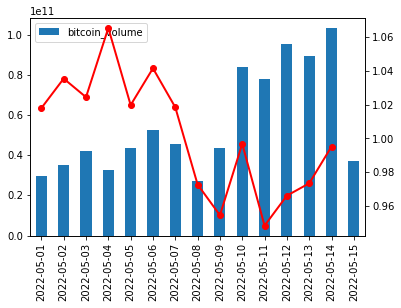

In [130]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = btc[['bitcoin_volume']].plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax.set_yticklabels(btc['bitcoin_volume'])
ax.set_xticklabels(btc['date'], rotation=90)
ax2.plot(btc[['sentiment']].values, linestyle='-', marker='o', linewidth=2.0, color="red")